In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Practice

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# prepare data
x = np.array([90,130,210,300,350,420,480,530,640,710])
y= np.array([7.1,10.9,19.2,28,32.8,39.9,46.1,51,62.2,68.9,])

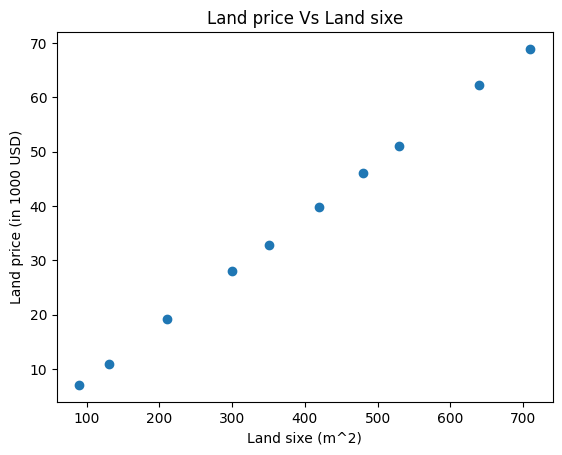

In [ ]:
plt.scatter(x,y)
plt.title('Land price Vs Land sixe')
plt.xlabel('Land sixe (m^2)')
plt.ylabel('Land price (in 1000 USD)')
plt.show()

In [ ]:
corr = np.corrcoef(x,y)
print(corr)

[[1.         0.99997851]
 [0.99997851 1.        ]]


In [ ]:
def hyp(x,a,b):
    """
    Hypothesis function
    x= input feature, scaler or numpy array
    a, b scaler
    """
    y = a*x + b
    return y
print(hyp(2,1,3))

5


In [ ]:
print(len(x))
print(len(y))

10
10


In [ ]:
print(x.shape)
print(y.shape)

(10,)
(10,)


In [ ]:
a = np.array([1,2,3,4,5,6,7,8,9,10])
b = np.array([1,1,1,1,1,1,1,1,1,1])

(10,)

In [ ]:
print(x)

[ 90 130 210 300 350 420 480 530 640 710]


In [ ]:
# print(hyp(x,[1,2,3,4,5,6,7,8,9,10],y))
print(hyp(x,1,1))

[ 91 131 211 301 351 421 481 531 641 711]


In [ ]:
def cos_func(x,a,b,y):
    """
    cost function: mean squre error
    y: target feature
    """
    j= ((hyp(x,a,b)-y)**2).mean()
    return j

In [ ]:
print(cos_func(x,a,b,y))

1733.1970000000001


In [ ]:
def grad_a(x,a,b,y):
    grad= ((hyp(x,a,b)-y)*x).mean()
    grad= 2*grad
    return grad

In [ ]:
def grad_b(x,a,b,y):
    grad= ((hyp(x,a,b)-y)).mean()
    grad= 2*grad
    return grad

In [ ]:
# Training Data
a, b = 0,0 # initialize a and b
alpha = 0.000001 # Learning rate
j_list = []
for iter in range(15):
    print("-"*100)
    print(f'x: {x}')
    print(f'y: {y}')
    print(f'a: {a}')
    print(f'b: {b}')
    j = cos_func(x,a,b,y)
    # print(f'j: {j}')
    print(f'grad_a: {grad_a(x,a,b,y)}')
    print(f'grad_b: {grad_b(x,a,b,y)}')
    j_list.append(j) # add j to j_list
    a += -alpha*grad_a(x,a,b,y)
    b += -alpha*grad_b(x,a,b,y)
    print(f"Iter{iter}: mse = {j:.4f}")



----------------------------------------------------------------------------------------------------
x: [ 90 130 210 300 350 420 480 530 640 710]
y: [ 7.1 10.9 19.2 28.  32.8 39.9 46.1 51.  62.2 68.9]
a: 0
b: 0
grad_a: -36122.2
grad_b: -73.22
Iter0: mse = 1733.1970
----------------------------------------------------------------------------------------------------
x: [ 90 130 210 300 350 420 480 530 640 710]
y: [ 7.1 10.9 19.2 28.  32.8 39.9 46.1 51.  62.2 68.9]
a: 0.03612219999999999
b: 4.5333661600000006e-05
grad_a: -22518.544482413246
grad_b: -45.33357093267681
Iter1: mse = 674.0780
----------------------------------------------------------------------------------------------------
x: [ 90 130 210 300 350 420 480 530 640 710]
y: [ 7.1 10.9 19.2 28.  32.8 39.9 46.1 51.  62.2 68.9]
a: 0.05864074448241324
b: 7.328291619225379e-05
grad_a: -14038.039053511873
grad_b: -27.9491986937446
Iter2: mse = 262.4764
----------------------------------------------------------------------------------

In [ ]:
# Convergent value of a and b
print(f"a = {a:.4f}, b = {b:.4f}")

a = 0.0958, b = 0.0001


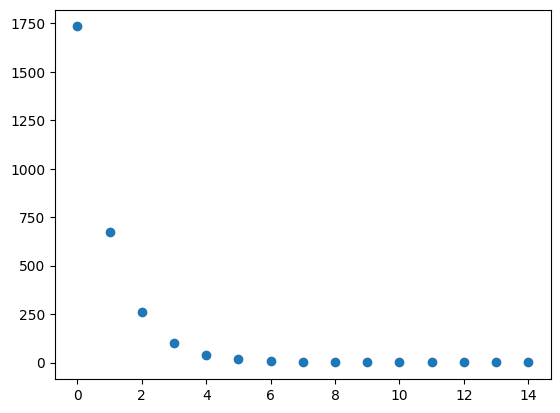

In [ ]:
# plot Cost Vs Iteration
plt.scatter(range(len(j_list)), j_list)
plt.show()

In [ ]:
# Evaulation
RSS = ((hyp(x,a,b)-y)**2).sum()
TSS = ((hyp(x,a,b)-y.mean())**2).sum()
R_2 = 1 -(RSS/TSS)
print(f"R square value is {R_2:.4f}")

R square value is 0.9977


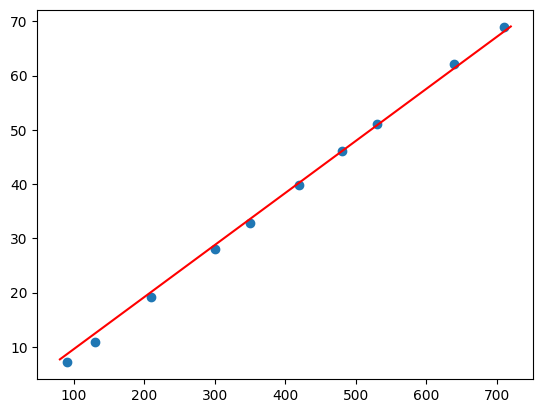

In [ ]:
# Predict Land price
x_new = np.arange(80,730,10) # Create x data from 80 to 720 with 10 per step
y_predict = hyp(x_new, a, b)
plt.scatter(x,y)
plt.plot(x_new, y_predict, color = 'red') # plot predict x
plt.show()

# Example

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns


## Dataset

In [ ]:
# path = "/content/drive/MyDrive/Regression/land_price_1.csv"
path ='land_price_1.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,land_area,dist_to_city,price
0,122,12.9,15.7
1,173,18.4,11.3
2,341,11.0,42.0
3,439,19.3,35.0
4,477,19.7,37.7


In [ ]:
df.shape

(30, 3)

In [ ]:
X_multi =df.drop("price", axis = 1) # call all feature except price

In [ ]:
X_multi.head()

,land_area,dist_to_city
0,122,12.9
1,173,18.4
2,341,11.0
3,439,19.3
4,477,19.7


In [ ]:
x1= df['land_area']
x1.head()

0    122
1    173
2    341
3    439
4    477
Name: land_area, dtype: int64

In [ ]:
x2= df['dist_to_city']
x2.head()

0    12.9
1    18.4
2    11.0
3    19.3
4    19.7
Name: dist_to_city, dtype: float64

In [ ]:
y2= df['price']
y2.head()

0    15.7
1    11.3
2    42.0
3    35.0
4    37.7
Name: price, dtype: float64

In [ ]:
def hypo(x1,x2,a,b,c):
    y2 = a*x1 + b*x2 + c
    return y2
print(hypo(2,1,3,4,5))

15


In [ ]:
def cos_funct(x1,x2,a,b,c,y2):
    J= ((hypo(x1,x2,a,b,c)-y2)**2).mean()
    return J

In [ ]:
def grad_a(x1,x2,a,b,c,y2):
    grad_mul = ((hypo(x1,x2,a,b,c)-y2)*x1).mean()
    grad_mul = 2*grad_mul
    return grad_mul

In [ ]:
def grad_b(x1,x2,a,b,c,y2):
    grad_mul = ((hypo(x1,x2,a,b,c)-y2)*x2).mean()
    grad_mul = 2*grad_mul
    return grad_mul

In [ ]:
def grad_c(x1,x2,a,b,c,y2):
    grad_mul = ((hypo(x1,x2,a,b,c)-y2)).mean()
    grad_mul = 2*grad_mul
    return grad_mul

## Gradient Descent

In [ ]:
# Training Data
a, b, c = 0,0, 0
alpha = 0.00000001
J_list = []
for iter in range(500):
    J = cos_funct(x1,x2,a,b,c,y2)
    J_list.append(J)
    a += -alpha*grad_a(x1,x2,a,b,c,y2)
    b += -alpha*grad_b(x1,x2,a,b,c,y2)
    c += -alpha*grad_c(x1,x2,a,b,c,y2)
    print(f"Iter{iter}, mse = {J:.4f}")


Iter0, mse = 35052.9207
Iter1, mse = 30805.1279
Iter2, mse = 27074.4585
Iter3, mse = 23797.9583
Iter4, mse = 20920.3369
Iter5, mse = 18393.0353
Iter6, mse = 16173.4055
Iter7, mse = 14223.9920
Iter8, mse = 12511.8988
Iter9, mse = 11008.2346
Iter10, mse = 9687.6254
Iter11, mse = 8527.7863
Iter12, mse = 7509.1452
Iter13, mse = 6614.5128
Iter14, mse = 5828.7922
Iter15, mse = 5138.7248
Iter16, mse = 4532.6657
Iter17, mse = 4000.3878
Iter18, mse = 3532.9090
Iter19, mse = 3122.3407
Iter20, mse = 2761.7548
Iter21, mse = 2445.0663
Iter22, mse = 2166.9312
Iter23, mse = 1922.6561
Iter24, mse = 1708.1189
Iter25, mse = 1519.6992
Iter26, mse = 1354.2176
Iter27, mse = 1208.8817
Iter28, mse = 1081.2388
Iter29, mse = 969.1350
Iter30, mse = 870.6787
Iter31, mse = 784.2084
Iter32, mse = 708.2649
Iter33, mse = 641.5666
Iter34, mse = 582.9882
Iter35, mse = 531.5411
Iter36, mse = 486.3570
Iter37, mse = 446.6737
Iter38, mse = 411.8213
Iter39, mse = 381.2118
Iter40, mse = 354.3287
Iter41, mse = 330.7183
Iter4

In [ ]:
print(f"a = {a:.4f}, b = {b=:.4f}, c = {c:.4f}")

a = 0.1054, b = b=-0.0001, c = 0.0001


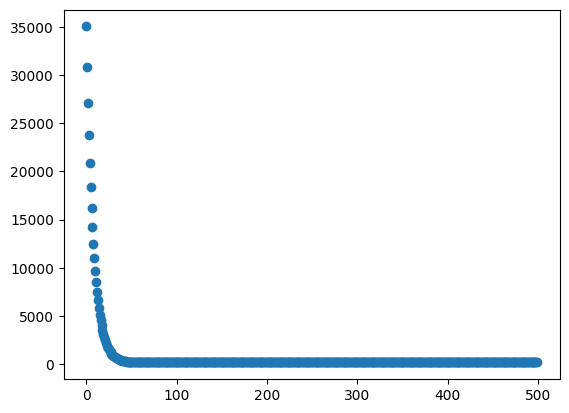

In [ ]:
plt.scatter(range(500), J_list)
plt.show()

## R square

In [ ]:
# Evaulation
RSS = ((hypo(x1,x2,a,b,c)-y2)**2).sum()
TSS = ((hypo(x1,x2,a,b,c)-y2.mean())**2).sum()
R_2 = 1 -(RSS/TSS)
print(f"R square value is {R_2:.4f}")

R square value is 0.9807


## Visualization

In [ ]:
import plotly.graph_objects as go
import numpy as np
import plotly.express as px

margin =0
# fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
x_min, x_max = x1.min() - margin, x1.max() + margin
y_min, y_max = x2.min() - margin, x2.max() + margin
xrange = np.arange(x_min, x_max, 100)
yrange = np.arange(y_min, y_max, 2)
xx, yy = np.meshgrid(xrange, yrange)
print(xx.shape,yy.shape)

# Run model
y_predict = hypo(xx,yy, a, b,c)
pred = y_predict
pred = pred.reshape(xx.shape)

# fig = px.scatter_3d(df, x=x1, y=x2, z=y2)
fig = go.Figure(data=[go.Scatter3d(
    x=x1,
    y=x2,
    z=y2,
    mode='markers',
    marker=dict(
        size=15,
        color=y2,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.6
    )
)])
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name='pred_surface'))
fig.show()

(10, 30) (10, 30)
